#### Homework1
*Mateo Larrea  
Music 320 - Fall 2025/2026*

## Lab Assignment 1
##### Generalized Sinusoids, Additive Synthesis, Taylor Series


In [1]:
# import libraries for the three labs

# for numerical operations, complex numbers, and array manipulations
import numpy as np

# for creating plots (2d and 3d)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3d plotting

# for playing audio signals in the notebook
from IPython.display import Audio

# for factorial calculations :)
import math

# set to display plots inline in the notebook
%matplotlib inline

print("All libraries loaded successfully!")

All libraries loaded successfully!


#### Lab 1 (10 points)

Define the discrete-time generalized sinusoid $x(n)=Xz_{0}^{n}$ for $n=0,1,2,...$, where
$$X=2.5\,e^{j\pi/4}$$
$$z_{0}=0.85\,e^{j\pi/8}$$

a) Plot re{$Xz_{0}^{n}$} and im{$Xz_{0}^{n}$} versus $n$.

b) Plot $Xz_{0}^{n}$ as a collection of points in the complex plane (imaginary part versus real part).

c) Mark circles on your plot, with the $k$th circle having radius $|X|e^{-k}$, where $k = 0, 1, 2, 3$ indicating the amplitude of the signal after $k$ time constants have passed. Does it take the same amount of time $\tau$ to go from the
k = 0 circle to the k = 1 circle as it does to go from the k = 1 circle to the k = 2 circle, etc.?
What is the number of time steps (samples) that it takes for the signal to traverse between successive circles?

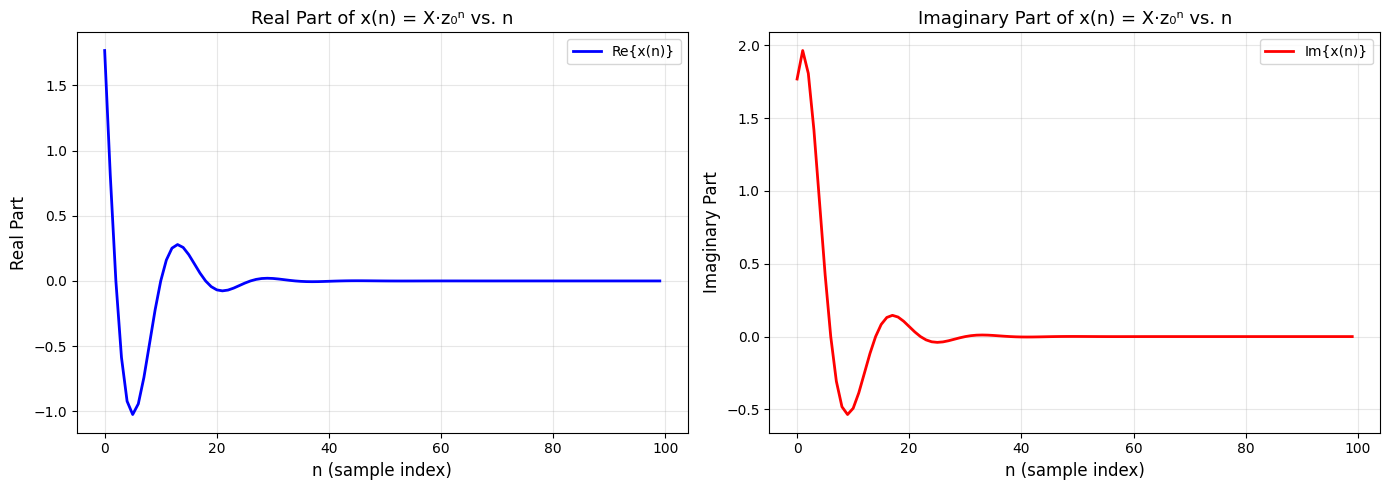

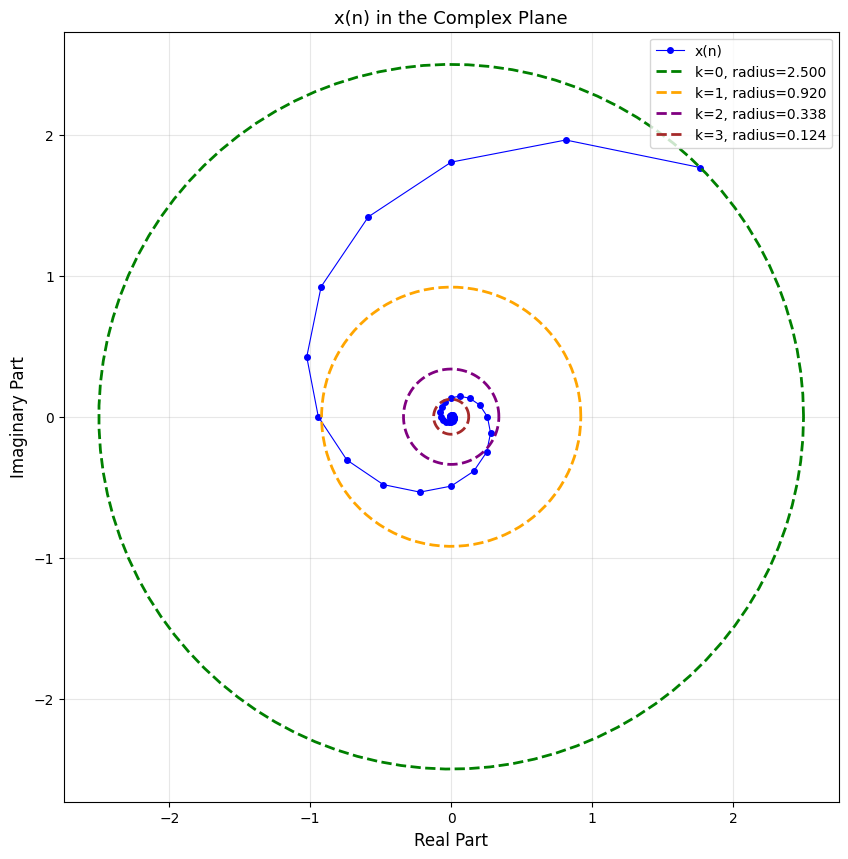

Time constant τ = 6.153 samples
This is the number of samples for amplitude to decay by factor e

Time to traverse between successive circles:
  From circle k=0 to k=1: 6.153 samples
  From circle k=1 to k=2: 6.153 samples
  From circle k=2 to k=3: 6.153 samples

Answer: Yes, it takes the same amount of time τ = 6.153 samples
to traverse between any pair of successive circles.
This is because exponential decay is characterized by equal time
intervals for equal ratios of amplitude.


In [2]:
# LAB 1: GENERALIZED SINUSOIDS
#
# HIGH-LEVEL GOAL: We're exploring how complex numbers can represent signals that both rotate 
# and shrink over time. Think of it like a spiral - the signal spins around 
# while getting smaller. We'll visualize this pattern and measure how fast 
# the signal decays.
#
# THINGS TO CONSIDER:
# - The magnitude |z_0| determines whether the signal grows (|z_0| > 1) or 
#   decays (|z_0| < 1) exponentially
# - The angle of z_0 determines the rate of rotation in the complex plane
# - A "time constant" τ represents the time for the amplitude to decay by 
#   a factor of e (Euler's number ≈ 2.718)
# - The signal traces a spiral path in the complex plane

# Part a) and b) setup: Define the complex numbers X and z_0

# Define X = 2.5 * e^(j*pi/4) using Euler's formula: e^(jθ) = cos(θ) + j*sin(θ)
X = 2.5 * np.exp(1j * np.pi / 4)

# Define z_0 = 0.85 * e^(j*pi/8)
z_0 = 0.85 * np.exp(1j * np.pi / 8)

# Generate the discrete-time index n from 0 to 99 (100 samples)
# This provides enough samples to see several oscillations and decay
n = np.arange(0, 100)

# Compute the generalized sinusoid x(n) = X * z_0^n for all values of n
# z_0**n raises z_0 to the power of each element in the array n
x_n = X * (z_0 ** n)

real_part = np.real(x_n) # Extract the real part of x(n) for plotting
imag_part = np.imag(x_n) # Extract the imaginary part of x(n) for plotting

# Part a): Plot real{x(n)} and imag{x(n)} versus n

# Create a new figure with specified size for better visibility
plt.figure(figsize=(14, 5))

# Create the first subplot (1 row, 2 columns, position 1)
plt.subplot(1, 2, 1)
# Plot the real part of x(n) versus n with a solid blue line
plt.plot(n, real_part, 'b-', linewidth=2, label='Re{x(n)}')
# Add grid for easier reading of values
plt.grid(True, alpha=0.3)
# Label the horizontal axis
plt.xlabel('n (sample index)', fontsize=12)
# Label the vertical axis
plt.ylabel('Real Part', fontsize=12)
# Add a title to describe the plot
plt.title('Real Part of x(n) = X·z₀ⁿ vs. n', fontsize=13)
# Display the legend
plt.legend()

# Create the second subplot (1 row, 2 columns, position 2)
plt.subplot(1, 2, 2)
# Plot the imaginary part of x(n) versus n with a solid red line
plt.plot(n, imag_part, 'r-', linewidth=2, label='Im{x(n)}')
# Add grid for easier reading of values
plt.grid(True, alpha=0.3)
# Label the horizontal axis
plt.xlabel('n (sample index)', fontsize=12)
# Label the vertical axis
plt.ylabel('Imaginary Part', fontsize=12)
# Add a title to describe the plot
plt.title('Imaginary Part of x(n) = X·z₀ⁿ vs. n', fontsize=13)
# Display the legend
plt.legend()

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()
# Display the figure
plt.show()

# Part b): Plot x(n) as points in the complex plane (imaginary vs. real)

# Create a new figure for the complex plane plot
plt.figure(figsize=(10, 10))
# Plot imaginary part (y-axis) versus real part (x-axis) as individual points
# 'o' creates circular markers, markersize controls point size
plt.plot(real_part, imag_part, 'bo-', markersize=4, linewidth=0.8, label='x(n)')
# Add grid for reference
plt.grid(True, alpha=0.3)
# Label the horizontal axis as the real axis
plt.xlabel('Real Part', fontsize=12)
# Label the vertical axis as the imaginary axis
plt.ylabel('Imaginary Part', fontsize=12)
# Title the plot
plt.title('x(n) in the Complex Plane', fontsize=13)
# Make the axes equal scale so circles appear circular (not elliptical)
plt.axis('equal')
# Display the legend
plt.legend()

# Part c): Mark circles with radius |X|·e^(-k) for k = 0, 1, 2, 3

# Calculate the magnitude of X (initial amplitude)
X_magnitude = np.abs(X)

# Calculate the magnitude of z_0 (determines decay/growth rate)
z0_magnitude = np.abs(z_0)

# Calculate the time constant τ (in samples)
# τ is the time it takes for amplitude to decay by factor e
# Since |x(n)| = |X| * |z_0|^n, we need |z_0|^τ = e^(-1)
# Taking natural log: τ * ln(|z_0|) = -1, so τ = -1 / ln(|z_0|)
tau = -1 / np.log(z0_magnitude)

# Create an array of angles from 0 to 2π for drawing circles
# linspace creates 100 evenly spaced points for smooth circles
theta = np.linspace(0, 2 * np.pi, 100)

# Define colors for each circle k = 0, 1, 2, 3
colors = ['green', 'orange', 'purple', 'brown']

# Loop through k = 0, 1, 2, 3 to draw each circle
for k in range(4):
    # Calculate the radius for the k-th circle: |X| * e^(-k)
    radius = X_magnitude * np.exp(-k)
    
    # Calculate x-coordinates of the circle: radius * cos(θ)
    x_circle = radius * np.cos(theta)
    
    # Calculate y-coordinates of the circle: radius * sin(θ)
    y_circle = radius * np.sin(theta)
    
    # Plot the circle with a dashed line and label showing k and radius
    plt.plot(x_circle, y_circle, '--', color=colors[k], linewidth=2, 
             label=f'k={k}, radius={radius:.3f}')

# Update the legend to include the circles
plt.legend(loc='upper right')
# Display the updated plot with circles
plt.show()

# Part c) Analysis: Calculate time between successive circles

# Print the time constant
print(f"Time constant τ = {tau:.3f} samples")
print(f"This is the number of samples for amplitude to decay by factor e\n")

# For each pair of successive circles, calculate the time to traverse
print("Time to traverse between successive circles:")
for k in range(3):
    # The radius of the k-th circle is |X| * e^(-k)
    # The amplitude at sample n is |X| * |z_0|^n
    # We need to find n such that |X| * |z_0|^n = |X| * e^(-(k+1))
    # This gives: |z_0|^n = e^(-(k+1))
    # Taking log: n * ln(|z_0|) = -(k+1)
    # So: n = -(k+1) / ln(|z_0|) = (k+1) * τ
    
    # Time to reach circle k (starting from n=0)
    n_k = k * tau
    
    # Time to reach circle k+1
    n_k_plus_1 = (k + 1) * tau
    
    # Time difference (always equals τ)
    time_diff = n_k_plus_1 - n_k
    
    # Print the result
    print(f"  From circle k={k} to k={k+1}: {time_diff:.3f} samples")

# Answer the question about equal time intervals
print(f"\nAnswer: Yes, it takes the same amount of time τ = {tau:.3f} samples")
print(f"to traverse between any pair of successive circles.")
print(f"This is because exponential decay is characterized by equal time")
print(f"intervals for equal ratios of amplitude.")


#### Lab 2 (15 points) Additive synthesis:

The sum of $K$ sinusoids, can be expressed as
$$y(t) = \sum_{k=0}^{K-1} y_k(t) = \sum_{k=0}^{K-1} A_k \cos(2 \pi f_k t + \phi_k) $$
where $A_k$, $f_k$, and $\phi_k$ are the peak amplitude, frequency (Hz),
and initial phase (rad) of the $k$th sinusoidal component of frequency $f_k$. $K$ is the total number of sinusoidal components. Creating such a sum of sinusoids is known as *additive synthesis*.

a) Write a function that generates N samples of a sinusoid knowing its amplitude, A, frequency, f, phase, phi, given the sampling frequency Fs.  Use this function to create, plot (only 0.01 s), and listen to one-second-long, unit-amplitude, zero-phase, $440$ Hz cosine wave sampled with a sampling frequency Fs = 44100 Hz.

b) Write a function that uses the function above to generate the sum of $K$ sinusoids.  This function should take lists/vectors of amplitudes, frequencies, and phases (each of the same length) as well as the number of samples and the sampling frequency and should return the sum of the sinusoids.  Use your function to create the sum of $K=5$ sinusoids with frequencies $f_k$ = $[220, 660, 1100, 1540,1980]$ and amplitudes $A_k$ = $[ 1, -1/3, 1/5,- 1/7,1/9 ]$, all with zero phase.  Use a sampling frequency Fs = $44.1 kHz$ and return a one-second segment. Plot (only 0.01 s) and listen to it.  How does it sound? What waveform does this approximate?

c) Use the functions above to create a signal that is comprised of each of the sinusoids from b) (starting with 220Hz) presented in a sequence 1 second long and added to the previous sinusoid (e.g., 220Hz for 1 second, then add the 660Hz sinusoid for 1 second, ..., finally add the 1980 Hz sinusoid for 1 second). Plot (full duration) and listen to it.  Plot at t = [0.1, 1.1, 2.1, 3.1, 4.1] seconds for 0.02 s. How does the signal evolve through time? How does it sound?

d) Generate the same waveform as in b) but with randomized phase. Does it sound the same as b)? Does it look the same?

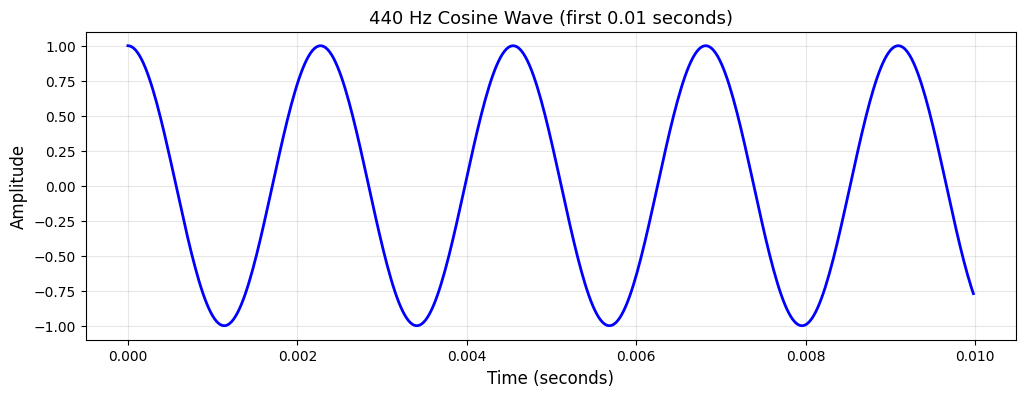

440 Hz tone (A4 note):


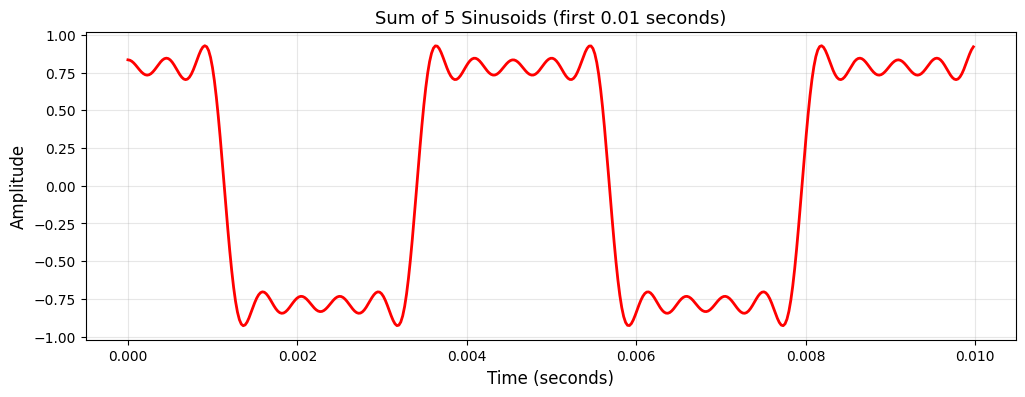

Sum of 5 harmonics (approximates a square wave):



Analysis:
This waveform approximates a SQUARE WAVE.
The sum of odd harmonics (1, 3, 5, 7, 9) with amplitudes 1/n
is the Fourier series representation of a square wave.
With only 5 terms, we see a square-ish wave with some ripples (Gibbs phenomenon).
The sound is 'hollow' or 'clarinet-like', rich in odd harmonics.


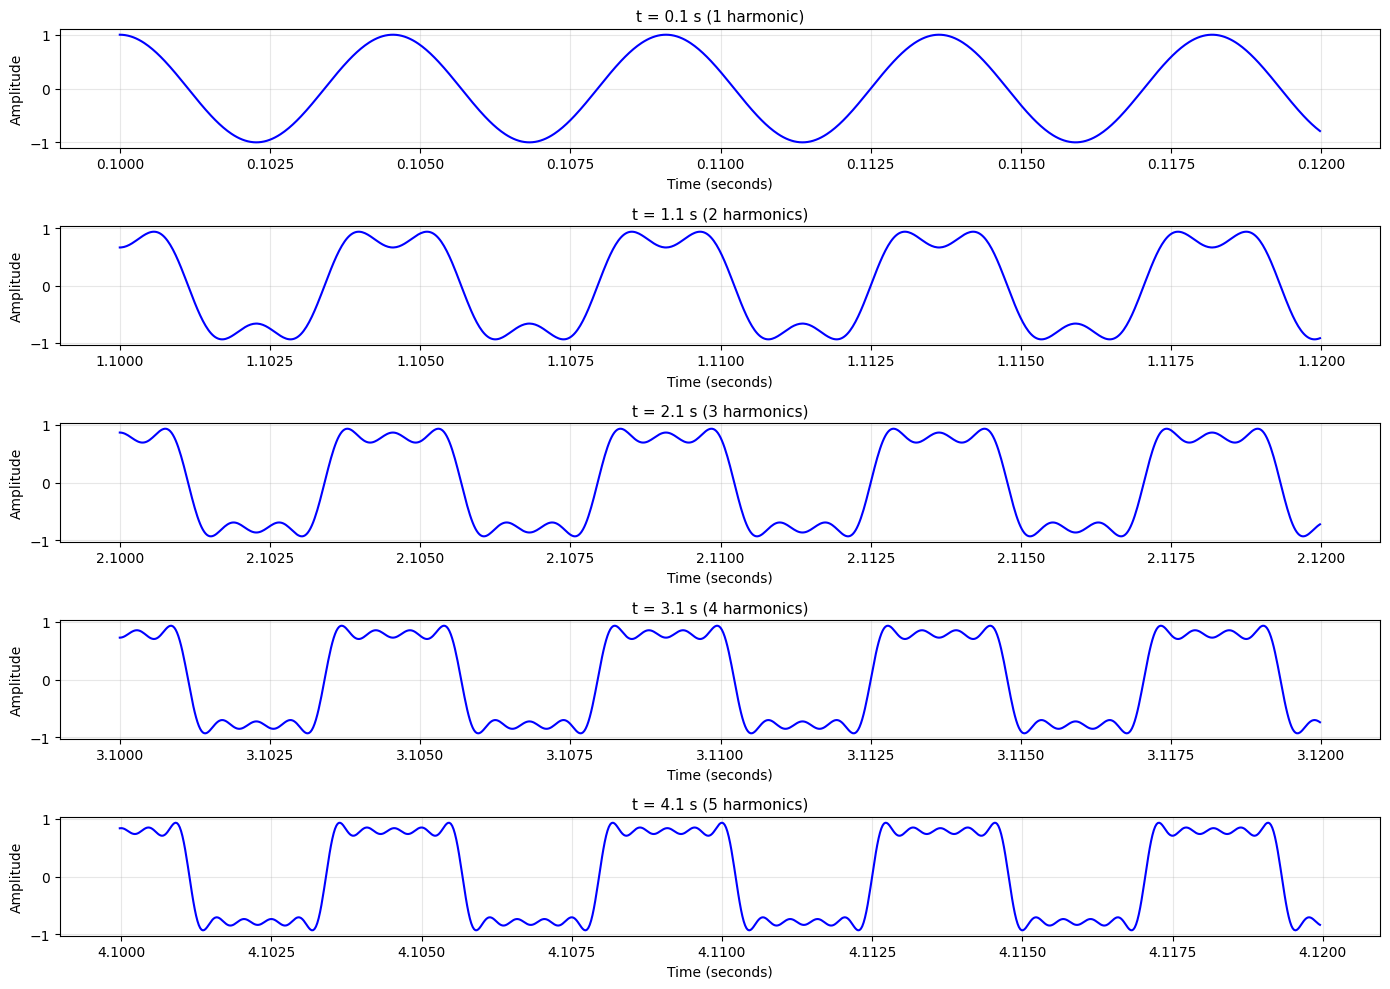

Sequential addition of harmonics (5 seconds total):



Analysis of sequential synthesis:
- At t=0.1s: Single 220 Hz sine wave (pure tone)
- At t=1.1s: Two harmonics, sound becomes richer
- At t=2.1s: Three harmonics, waveform starts to flatten on top
- At t=3.1s: Four harmonics, more square-like appearance
- At t=4.1s: Five harmonics, clear approximation of square wave

The signal evolves from a pure sine wave to a square-ish wave.
Sonically, it starts as a pure tone and becomes increasingly 'hollow' and bright.


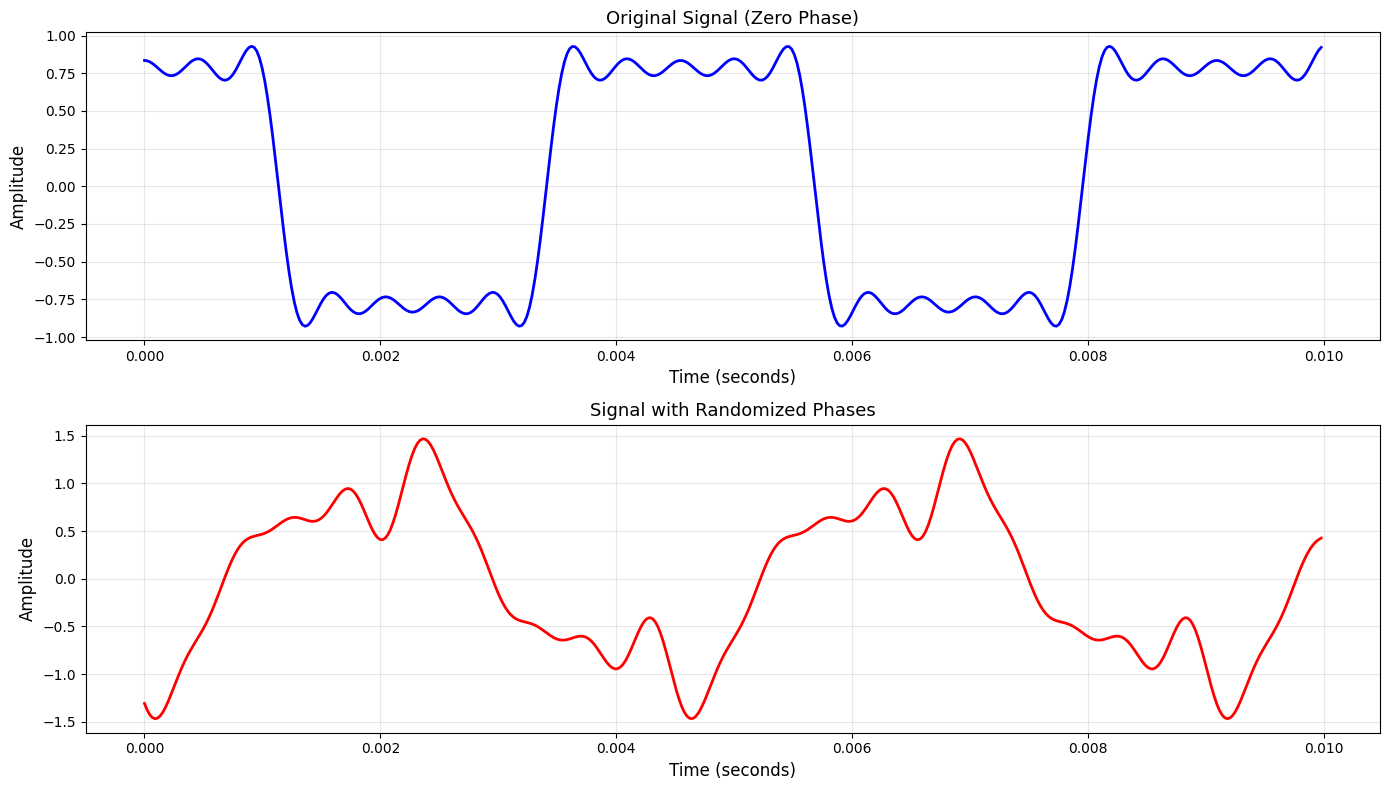

Sum of 5 harmonics with RANDOM phases:



Analysis - Comparison of zero phase vs random phase:

Visual appearance (waveform):
  - The signals look DIFFERENT in the time domain
  - The zero-phase version has a specific symmetric shape
  - The random-phase version has a different shape (asymmetric)
  - Both are still periodic with the same fundamental frequency

Auditory perception (sound):
  - The signals sound nearly IDENTICAL to human ears
  - Both have the same pitch (220 Hz fundamental)
  - Both have the same timbre (same harmonic content)
  - This demonstrates that phase is much less important than
    amplitude and frequency for perception of pitch and timbre
  - However, phase does affect the exact waveform shape

Random phases used (in radians):
  Harmonic 1 (220 Hz): φ = 3.575 rad
  Harmonic 2 (660 Hz): φ = 5.322 rad
  Harmonic 3 (1100 Hz): φ = 1.611 rad
  Harmonic 4 (1540 Hz): φ = 5.440 rad
  Harmonic 5 (1980 Hz): φ = 2.843 rad


In [3]:
# LAB 2: ADDITIVE SYNTHESIS
# HIGH-LEVEL GOAL:
# We're learning how to build complex musical sounds by adding together 
# simple sine waves. Each sine wave has its own pitch (frequency) and 
# volume (amplitude). When we combine them in the right way, we can create 
# interesting sounds like a square wave. We'll also see how changing the 
# timing (phase) of these waves affects the shape but not the sound.


# THINGS TO CONSIDER:
# - Each sinusoid is characterized by three parameters: amplitude (A), 
#   frequency (f), and phase (φ)
# - The sampling frequency (Fs) determines the time resolution of our signal
# - Harmonically related frequencies (integer multiples of a fundamental) 
#   create periodic waveforms
# - Phase relationships between sinusoids affect the waveform shape but may 
#   not significantly affect perception (phase is less perceptually important)
# - The Fourier series shows that any periodic waveform can be built from 
#   sums of sinusoids

# Part a): Create function to generate a single sinusoid

def generate_sinusoid(A, f, phi, N, Fs):
    """
    Generate N samples of a sinusoid with given parameters.
    
    Parameters:
    -----------
    A : float
        Amplitude (peak value) of the sinusoid
    f : float
        Frequency in Hz (cycles per second)
    phi : float
        Initial phase in radians
    N : int
        Number of samples to generate
    Fs : float
        Sampling frequency in Hz (samples per second)
    
    Returns:
    --------
    y : numpy array
        Array of N samples containing the sinusoid values
    """
    # Create time vector: t[n] = n/Fs for n = 0, 1, 2, ..., N-1
    # This converts sample indices to time in seconds
    t = np.arange(N) / Fs
    
    # Generate the sinusoid using the formula: y(t) = A * cos(2πft + φ)
    # 2*π*f*t represents the phase accumulation over time
    # phi is added as the initial phase offset
    y = A * np.cos(2 * np.pi * f * t + phi)
    
    # Return the generated sinusoid
    return y

# Define the sampling frequency (CD quality audio)
Fs = 44100  # samples per second (Hz)

# Calculate number of samples for 1 second of audio
N_one_sec = Fs  # 44100 samples = 1 second at Fs = 44100 Hz

# Generate a 1-second, 440 Hz (musical note A4), unit amplitude, zero phase cosine
# A = 1 (unit amplitude), f = 440 Hz, phi = 0 (zero phase)
signal_440 = generate_sinusoid(A=1, f=440, phi=0, N=N_one_sec, Fs=Fs)

# Calculate number of samples for 0.01 seconds (for plotting a short segment)
# 0.01 seconds shows about 4-5 cycles of a 440 Hz signal
N_plot = int(0.01 * Fs)  # 441 samples for 0.01 seconds

# Create time vector for the plot (in seconds)
t_plot = np.arange(N_plot) / Fs

# Create a figure for plotting the 440 Hz sinusoid
plt.figure(figsize=(12, 4))
# Plot the first 0.01 seconds of the signal
plt.plot(t_plot, signal_440[:N_plot], 'b-', linewidth=2)
# Add grid for readability
plt.grid(True, alpha=0.3)
# Label the x-axis with time
plt.xlabel('Time (seconds)', fontsize=12)
# Label the y-axis with amplitude
plt.ylabel('Amplitude', fontsize=12)
# Add descriptive title
plt.title('440 Hz Cosine Wave (first 0.01 seconds)', fontsize=13)
# Display the plot
plt.show()

# Create an audio player widget to listen to the 440 Hz tone
# The Audio object takes the signal array and the sampling rate
# autoplay=False means it won't start playing automatically
print("440 Hz tone (A4 note):")
display(Audio(signal_440, rate=Fs, autoplay=False))

# Part b): Create function to sum multiple sinusoids (additive synthesis)

def additive_synthesis(amplitudes, frequencies, phases, N, Fs):
    """
    Generate the sum of K sinusoids using additive synthesis.
    
    Parameters:
    -----------
    amplitudes : list or array
        List of K amplitudes, one for each sinusoidal component
    frequencies : list or array
        List of K frequencies in Hz, one for each component
    phases : list or array
        List of K initial phases in radians, one for each component
    N : int
        Number of samples to generate
    Fs : float
        Sampling frequency in Hz
    
    Returns:
    --------
    y_sum : numpy array
        Array of N samples containing the sum of all sinusoids
    """
    # Initialize the output signal to zeros
    # This will accumulate the sum of all sinusoidal components
    y_sum = np.zeros(N)
    
    # Get the number of sinusoidal components K
    K = len(amplitudes)
    
    # Loop through each sinusoidal component
    for k in range(K):
        # Generate the k-th sinusoid using our generate_sinusoid function
        # Extract the k-th amplitude, frequency, and phase from the input lists
        y_k = generate_sinusoid(amplitudes[k], frequencies[k], phases[k], N, Fs)
        
        # Add this component to the running sum
        y_sum += y_k
    
    # Return the sum of all sinusoids
    return y_sum

# Define the frequencies for the 5 sinusoids (in Hz)
# These are odd harmonics of 220 Hz: 220, 3*220, 5*220, 7*220, 9*220
frequencies_b = [220, 660, 1100, 1540, 1980]

# Define the amplitudes for the 5 sinusoids
# These follow the pattern 1, -1/3, 1/5, -1/7, 1/9 (alternating signs)
# This is the Fourier series for a square wave
amplitudes_b = [1, -1/3, 1/5, -1/7, 1/9]

# Define phases (all zero for this part)
phases_b = [0, 0, 0, 0, 0]

# Generate the sum of the 5 sinusoids for 1 second
signal_sum = additive_synthesis(amplitudes_b, frequencies_b, phases_b, N_one_sec, Fs)

# Plot the first 0.01 seconds of the summed signal
plt.figure(figsize=(12, 4))
# Plot the summed waveform
plt.plot(t_plot, signal_sum[:N_plot], 'r-', linewidth=2)
# Add grid
plt.grid(True, alpha=0.3)
# Label axes
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
# Add title
plt.title('Sum of 5 Sinusoids (first 0.01 seconds)', fontsize=13)
# Display plot
plt.show()

# Create audio player for the summed signal
print("Sum of 5 harmonics (approximates a square wave):")
display(Audio(signal_sum, rate=Fs, autoplay=False))

# Print analysis of the waveform
print("\nAnalysis:")
print("This waveform approximates a SQUARE WAVE.")
print("The sum of odd harmonics (1, 3, 5, 7, 9) with amplitudes 1/n")
print("is the Fourier series representation of a square wave.")
print("With only 5 terms, we see a square-ish wave with some ripples (Gibbs phenomenon).")
print("The sound is 'hollow' or 'clarinet-like', rich in odd harmonics.")

# Part c): Sequential additive synthesis (building up harmonics over time)

# Calculate number of samples for 5 seconds (1 second per harmonic added)
N_five_sec = 5 * Fs  # 5 seconds total duration

# Initialize the output signal to zeros
signal_sequential = np.zeros(N_five_sec)

# Initialize a signal that will accumulate harmonics
accumulated_signal = np.zeros(Fs)  # One second buffer for accumulation

# Loop through each of the 5 harmonics
for k in range(5):
    # Generate the k-th harmonic for 1 second
    harmonic_k = generate_sinusoid(amplitudes_b[k], frequencies_b[k], phases_b[k], Fs, Fs)
    
    # Add this harmonic to the accumulated signal
    accumulated_signal += harmonic_k
    
    # Place the accumulated signal into the appropriate 1-second segment
    # Segment k goes from sample k*Fs to sample (k+1)*Fs
    signal_sequential[k*Fs : (k+1)*Fs] = accumulated_signal.copy()

# Define the time points to plot (0.1, 1.1, 2.1, 3.1, 4.1 seconds)
plot_times = [0.1, 1.1, 2.1, 3.1, 4.1]

# Calculate how many samples correspond to 0.02 seconds
N_plot_long = int(0.02 * Fs)  # 882 samples

# Create a figure with 5 subplots (one for each time point)
plt.figure(figsize=(14, 10))

# Loop through each time point to create subplots
for i, t_start in enumerate(plot_times):
    # Calculate the starting sample index
    start_sample = int(t_start * Fs)
    
    # Calculate the ending sample index (0.02 seconds later)
    end_sample = start_sample + N_plot_long
    
    # Create time vector for this segment (in seconds)
    t_segment = np.arange(start_sample, end_sample) / Fs
    
    # Extract the signal segment to plot
    signal_segment = signal_sequential[start_sample:end_sample]
    
    # Create subplot (5 rows, 1 column, position i+1)
    plt.subplot(5, 1, i+1)
    
    # Plot the signal segment
    plt.plot(t_segment, signal_segment, 'b-', linewidth=1.5)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Label x-axis
    plt.xlabel('Time (seconds)', fontsize=10)
    
    # Label y-axis
    plt.ylabel('Amplitude', fontsize=10)
    
    # Add title indicating time and number of harmonics
    num_harmonics = i + 1  # Harmonic count increases with each second
    plt.title(f't = {t_start} s ({num_harmonics} harmonic{"s" if num_harmonics > 1 else ""})', 
              fontsize=11)

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()

# Create audio player for the sequential signal
print("Sequential addition of harmonics (5 seconds total):")
display(Audio(signal_sequential, rate=Fs, autoplay=False))

# Print analysis
print("\nAnalysis of sequential synthesis:")
print("- At t=0.1s: Single 220 Hz sine wave (pure tone)")
print("- At t=1.1s: Two harmonics, sound becomes richer")
print("- At t=2.1s: Three harmonics, waveform starts to flatten on top")
print("- At t=3.1s: Four harmonics, more square-like appearance")
print("- At t=4.1s: Five harmonics, clear approximation of square wave")
print("\nThe signal evolves from a pure sine wave to a square-ish wave.")
print("Sonically, it starts as a pure tone and becomes increasingly 'hollow' and bright.")

# Part d): Generate same waveform as part b) but with randomized phases

# Generate random phases between 0 and 2π for each of the 5 harmonics
# np.random.rand(5) generates 5 random numbers in [0, 1)
# Multiplying by 2π scales to [0, 2π)
phases_random = np.random.rand(5) * 2 * np.pi

# Generate the sum with randomized phases
signal_random_phase = additive_synthesis(amplitudes_b, frequencies_b, phases_random, 
                                         N_one_sec, Fs)

# Plot comparison: original (zero phase) vs random phase
plt.figure(figsize=(14, 8))

# First subplot: original with zero phase
plt.subplot(2, 1, 1)
# Plot first 0.01 seconds
plt.plot(t_plot, signal_sum[:N_plot], 'b-', linewidth=2)
# Add grid
plt.grid(True, alpha=0.3)
# Label axes
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
# Add title
plt.title('Original Signal (Zero Phase)', fontsize=13)

# Second subplot: random phase version
plt.subplot(2, 1, 2)
# Plot first 0.01 seconds
plt.plot(t_plot, signal_random_phase[:N_plot], 'r-', linewidth=2)
# Add grid
plt.grid(True, alpha=0.3)
# Label axes
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
# Add title
plt.title('Signal with Randomized Phases', fontsize=13)

# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

# Create audio player for the random phase signal
print("Sum of 5 harmonics with RANDOM phases:")
display(Audio(signal_random_phase, rate=Fs, autoplay=False))

# Print analysis comparing the signals
print("\nAnalysis - Comparison of zero phase vs random phase:")
print("\nVisual appearance (waveform):")
print("  - The signals look DIFFERENT in the time domain")
print("  - The zero-phase version has a specific symmetric shape")
print("  - The random-phase version has a different shape (asymmetric)")
print("  - Both are still periodic with the same fundamental frequency")
print("\nAuditory perception (sound):")
print("  - The signals sound nearly IDENTICAL to human ears")
print("  - Both have the same pitch (220 Hz fundamental)")
print("  - Both have the same timbre (same harmonic content)")
print("  - This demonstrates that phase is much less important than")
print("    amplitude and frequency for perception of pitch and timbre")
print("  - However, phase does affect the exact waveform shape")

# Print the random phases used (for reproducibility and analysis)
print("\nRandom phases used (in radians):")
for k in range(5):
    print(f"  Harmonic {k+1} ({frequencies_b[k]} Hz): φ = {phases_random[k]:.3f} rad")


#### Lab 3 (10 points)

The Taylor-series expansion around zero (Maclaurin Series) for $sin(x)$ can be written as follows: 
$$\sin(x) = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$$

a) Write a Python function that generates the first 10 terms of the $sin(x)$ Taylor-series expansion around zero.

b) Create a plot (or a series of plots) that compares $sin(x)$ with its Taylor series for [1,2,3,10] terms. (You can use a sampled $x$ vector that goes from $-10$ to $+10$, on steps of $\frac{1}{100}$).

c) Plot $e^{jx}$ and the first 10 real and imaginary terms of its Taylor series expansion near x = 0, where the Taylor expansion at 0 can be written as follows:

$$e^{jx} = \sum_{n=0}^\infty \frac{(j)^n}{(n)!}x^{n} = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}x^{2n} +j \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1} = \cos(x) + j\sin(x)$$

where $j^{2n} = {(j^{2})}^n  = (-1)^n $  and   $j^{2n+1} = j({j^{2}})^n = j (-1)^n$.

This should be a 3D plot with $x$ on the $x$-axis, $\cos(x)$ on the $y$-axis and $\sin(x)$ on the $z$-axis.

Hint for 3D plotting:
```python
# get 3D plot area to plot on 
plt3D = plt.figure().add_subplot(111, projection='3d')
# call plot functions with `plt3D.` instead of `plt.`
# Note: `plt3D` is an "axis" object and its API uses 
# `set_XXX` for axis labels and limits where the pyplot API 
# would use just `XXX`. Example:  plt.xlim() -> plt3D.set_xlim()


# make the plot
plt3D.plot(x,y,z) # where x,y,z are what you want to plot
#plt3D.set_xlabel(<text>)
#...
#plt3D.set_xlim(xmin,xmax)
#...
plt3D.legend()
plt.show()
```

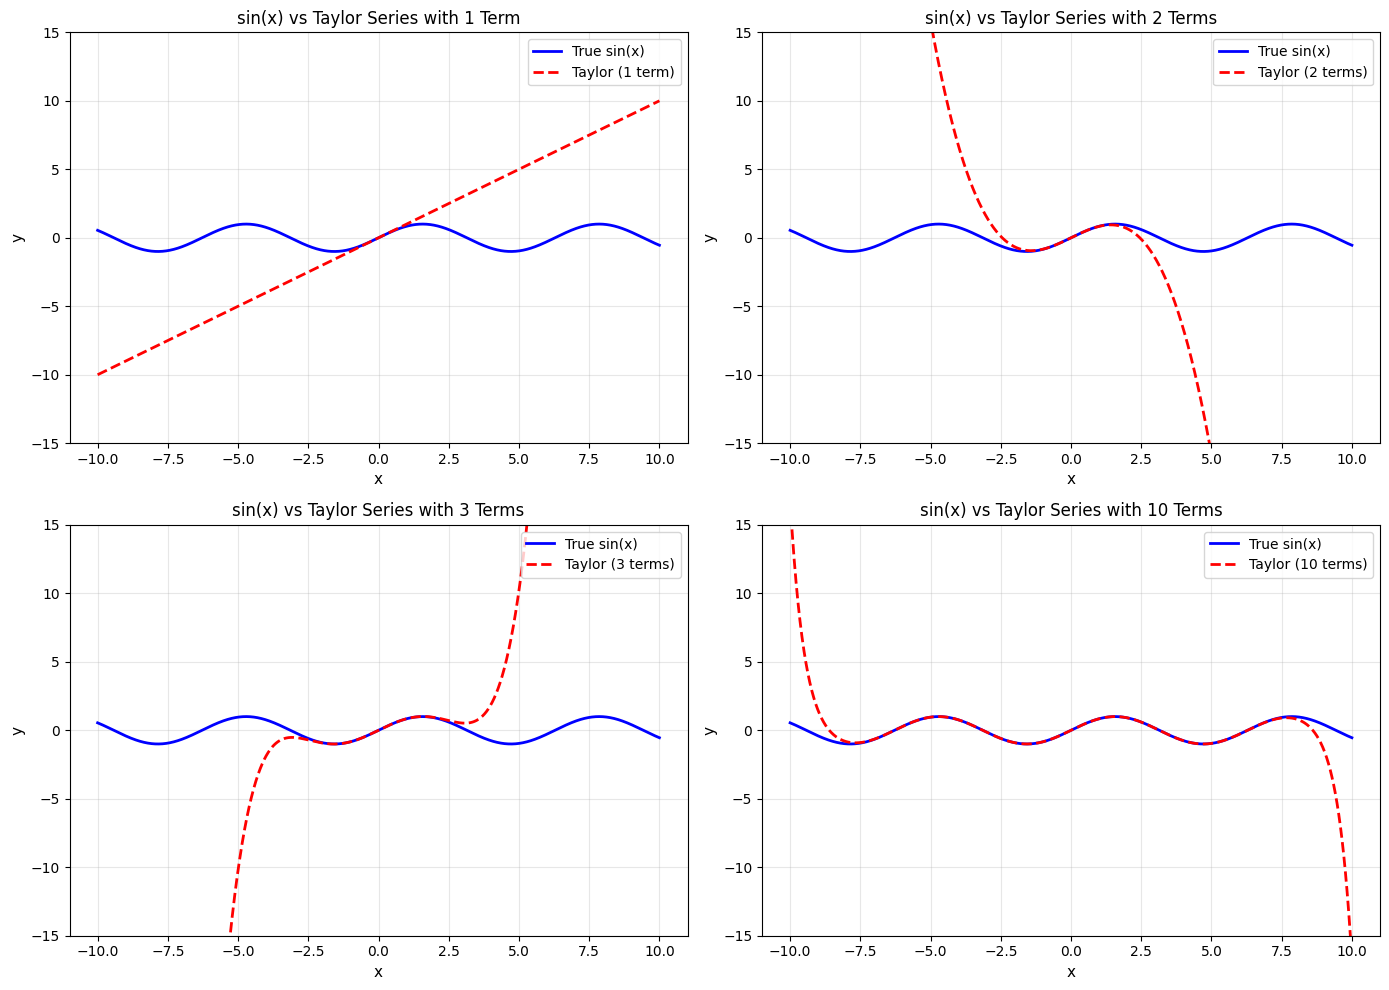

Analysis of Taylor Series Approximation for sin(x):

1 term:  Good approximation only very close to x=0 (roughly |x| < 1)
         Polynomial x/1! = x is tangent to sin(x) at origin

2 terms: Better approximation near x=0 (roughly |x| < 2)
         Includes correction term -x³/3!

3 terms: Good approximation over wider range (roughly |x| < 4)
         Includes up to x⁵/5! term

10 terms: Excellent approximation over entire range -10 to +10
          Nearly indistinguishable from true sin(x)

Key observation: More terms → better approximation, especially far from x=0


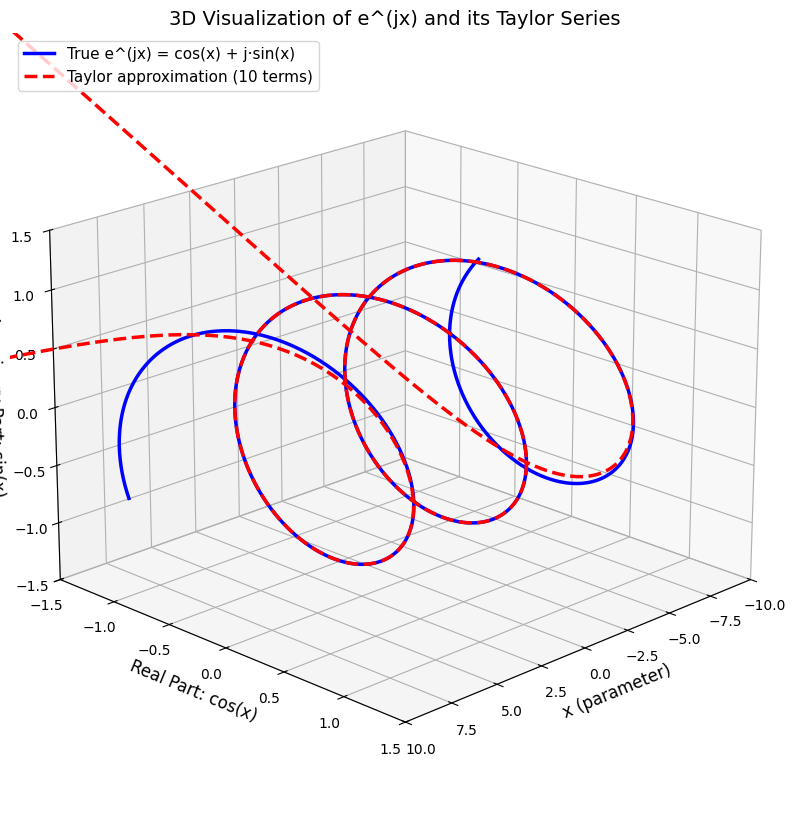


Analysis of e^(jx) in 3D:

Euler's Formula: e^(jx) = cos(x) + j·sin(x)

In 3D space (x, Re{e^(jx)}, Im{e^(jx)}):
  - The complex exponential traces a HELIX wrapped around a cylinder
  - The x-axis represents the parameter (time/angle)
  - The y-axis represents the real part: cos(x)
  - The z-axis represents the imaginary part: sin(x)
  - The projection onto the y-z plane is a unit circle
  - As x increases, the point rotates around the circle

With 10 terms, the Taylor series approximation is nearly perfect
over the entire range from -10 to +10, showing excellent agreement
with the true exponential function.

This demonstrates that:
  1. Trigonometric functions (cos, sin) are related to exponentials
  2. Complex exponentials represent rotations in the complex plane
  3. Taylor series can accurately approximate transcendental functions


In [4]:
# LAB 3: TAYLOR SERIES APPROXIMATIONS


# HIGH-LEVEL GOAL:
# We're learning how to approximate curved mathematical functions (like sine) 
# using simple polynomial equations. It's like describing a smooth curve using 
# a series of simpler building blocks. The more building blocks we use, the 
# more accurate our approximation becomes. We'll visualize this in 3D to see 
# how exponential functions create spiraling patterns.
#
# THINGS TO CONSIDER:
# - Taylor series represents smooth functions as infinite sums of polynomial terms
# - Near the expansion point (x=0), few terms give good approximations
# - Far from the expansion point, many terms are needed for accuracy
# - The factorial in denominators causes higher-order terms to shrink rapidly
# - Euler's formula connects exponential and trigonometric functions
# - The complex exponential traces a helix in 3D (time, real, imaginary) space

# Part a): Function to generate Taylor series for sin(x)

def sin_taylor_series(x, num_terms):
    """
    Compute the Taylor series approximation of sin(x) around x=0.
    
    The Taylor series for sin(x) is:
    sin(x) ≈ Σ(n=0 to num_terms-1) [(-1)^n / (2n+1)!] * x^(2n+1)
    
    Parameters:
    -----------
    x : float or numpy array
        Input value(s) at which to evaluate the series
    num_terms : int
        Number of terms to include in the series (starting from n=0)
    
    Returns:
    --------
    result : float or numpy array
        Approximation of sin(x) using the specified number of terms
    """
    # Initialize the result to zero
    # This will accumulate the sum of all terms
    result = np.zeros_like(x)
    
    # Loop through each term in the series (n = 0, 1, 2, ..., num_terms-1)
    for n in range(num_terms):
        # Calculate the power of x for this term: 2n+1
        # Terms are x^1, x^3, x^5, x^7, etc. (odd powers only)
        power = 2 * n + 1
        
        # Calculate the factorial of (2n+1) for the denominator
        factorial = math.factorial(power)
        
        # Calculate (-1)^n to get alternating signs: +, -, +, -, ...
        sign = (-1) ** n
        
        # Calculate this term: (-1)^n * x^(2n+1) / (2n+1)!
        term = sign * (x ** power) / factorial
        
        # Add this term to the running sum
        result += term
    
    # Return the final approximation
    return result

# Part b): Compare sin(x) with Taylor series for 1, 2, 3, and 10 terms

# Create x vector from -10 to +10 with step size 1/100 = 0.01
# This gives us 2001 points for smooth plotting
x = np.arange(-10, 10 + 0.01, 0.01)

# Compute the true sin(x) using NumPy's built-in function
sin_true = np.sin(x)

# Define the number of terms to compare: 1, 2, 3, and 10
terms_list = [1, 2, 3, 10]

# Create a figure with 4 subplots (2 rows, 2 columns)
plt.figure(figsize=(14, 10))

# Loop through each term count to create comparison plots
for i, num_terms in enumerate(terms_list):
    # Calculate the Taylor series approximation with this many terms
    sin_approx = sin_taylor_series(x, num_terms)
    
    # Create subplot (2 rows, 2 columns, position i+1)
    plt.subplot(2, 2, i + 1)
    
    # Plot the true sin(x) as a solid blue line
    plt.plot(x, sin_true, 'b-', linewidth=2, label='True sin(x)')
    
    # Plot the Taylor approximation as a dashed red line
    plt.plot(x, sin_approx, 'r--', linewidth=2, label=f'Taylor ({num_terms} term{"s" if num_terms > 1 else ""})')
    
    # Add grid for readability
    plt.grid(True, alpha=0.3)
    
    # Label x-axis
    plt.xlabel('x', fontsize=11)
    
    # Label y-axis
    plt.ylabel('y', fontsize=11)
    
    # Add title showing number of terms
    plt.title(f'sin(x) vs Taylor Series with {num_terms} Term{"s" if num_terms > 1 else ""}', 
              fontsize=12)
    
    # Set y-axis limits to see divergence clearly
    plt.ylim(-15, 15)
    
    # Add legend
    plt.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()

# Print analysis of the approximation quality
print("Analysis of Taylor Series Approximation for sin(x):")
print("\n1 term:  Good approximation only very close to x=0 (roughly |x| < 1)")
print("         Polynomial x/1! = x is tangent to sin(x) at origin")
print("\n2 terms: Better approximation near x=0 (roughly |x| < 2)")
print("         Includes correction term -x³/3!")
print("\n3 terms: Good approximation over wider range (roughly |x| < 4)")
print("         Includes up to x⁵/5! term")
print("\n10 terms: Excellent approximation over entire range -10 to +10")
print("          Nearly indistinguishable from true sin(x)")
print("\nKey observation: More terms → better approximation, especially far from x=0")

# Part c): 3D plot of e^(jx) and its Taylor series

def exp_taylor_series(x, num_terms):
    """
    Compute the Taylor series approximation of e^(jx) around x=0.
    
    The Taylor series for e^(jx) is:
    e^(jx) ≈ Σ(n=0 to num_terms-1) [(j)^n / n!] * x^n
          = Σ(n=0 to num_terms-1) [(-1)^n / (2n)!] * x^(2n) + 
            j * Σ(n=0 to num_terms-1) [(-1)^n / (2n+1)!] * x^(2n+1)
          = cos(x) + j*sin(x)
    
    Parameters:
    -----------
    x : float or numpy array
        Input value(s) at which to evaluate the series
    num_terms : int
        Number of terms to include in the series for each part (cos and sin)
    
    Returns:
    --------
    result : complex float or numpy array of complex
        Approximation of e^(jx) using the specified number of terms
    """
    # Initialize real part (will approximate cos(x))
    real_part = np.zeros_like(x)
    
    # Initialize imaginary part (will approximate sin(x))
    imag_part = np.zeros_like(x)
    
    # Loop through terms for the cosine series (even powers)
    # cos(x) = Σ [(-1)^n / (2n)!] * x^(2n)
    for n in range(num_terms):
        # Calculate the power for this term: 2n (even powers: 0, 2, 4, 6, ...)
        power = 2 * n
        
        # Calculate factorial of 2n
        factorial = math.factorial(power)
        
        # Calculate alternating sign: (-1)^n
        sign = (-1) ** n
        
        # Calculate this term and add to real part
        term = sign * (x ** power) / factorial
        real_part += term
    
    # Loop through terms for the sine series (odd powers)
    # sin(x) = Σ [(-1)^n / (2n+1)!] * x^(2n+1)
    for n in range(num_terms):
        # Calculate the power for this term: 2n+1 (odd powers: 1, 3, 5, 7, ...)
        power = 2 * n + 1
        
        # Calculate factorial of 2n+1
        factorial = math.factorial(power)
        
        # Calculate alternating sign: (-1)^n
        sign = (-1) ** n
        
        # Calculate this term and add to imaginary part
        term = sign * (x ** power) / factorial
        imag_part += term
    
    # Combine real and imaginary parts into complex number
    # This represents e^(jx) ≈ cos(x) + j*sin(x)
    result = real_part + 1j * imag_part
    
    # Return the complex result
    return result

# Use the same x vector from part b
# x ranges from -10 to +10 with step 0.01

# Compute the true e^(jx) using Euler's formula
exp_true = np.exp(1j * x)

# Extract real part (cos(x)) and imaginary part (sin(x)) of true value
cos_true = np.real(exp_true)
sin_true = np.imag(exp_true)

# Compute Taylor series approximation with 10 terms
num_terms_exp = 10
exp_approx = exp_taylor_series(x, num_terms_exp)

# Extract real and imaginary parts of the approximation
cos_approx = np.real(exp_approx)
sin_approx = np.imag(exp_approx)

# Create a 3D plot
# Get the 3D plotting area
fig = plt.figure(figsize=(14, 10))
plt3D = fig.add_subplot(111, projection='3d')

# Plot the true e^(jx) as a blue line in 3D space
# x-axis: x (the parameter), y-axis: Re{e^(jx)} = cos(x), z-axis: Im{e^(jx)} = sin(x)
plt3D.plot(x, cos_true, sin_true, 'b-', linewidth=2.5, label='True e^(jx) = cos(x) + j·sin(x)')

# Plot the Taylor approximation as a red dashed line
plt3D.plot(x, cos_approx, sin_approx, 'r--', linewidth=2.5, 
           label=f'Taylor approximation ({num_terms_exp} terms)')

# Set axis labels
plt3D.set_xlabel('x (parameter)', fontsize=12)
plt3D.set_ylabel('Real Part: cos(x)', fontsize=12)
plt3D.set_zlabel('Imaginary Part: sin(x)', fontsize=12)

# Set axis limits for better visualization
plt3D.set_xlim(-10, 10)  # x from -10 to 10
plt3D.set_ylim(-1.5, 1.5)  # cos(x) ranges from -1 to 1
plt3D.set_zlim(-1.5, 1.5)  # sin(x) ranges from -1 to 1

# Add title
plt3D.set_title('3D Visualization of e^(jx) and its Taylor Series', fontsize=14)

# Add legend
plt3D.legend(loc='upper left', fontsize=11)

# Set viewing angle for better perspective
# elev=20 sets elevation angle, azim=45 sets azimuth angle
plt3D.view_init(elev=20, azim=45)

# Display the 3D plot
plt.show()

# Print analysis of the 3D visualization
print("\nAnalysis of e^(jx) in 3D:")
print("\nEuler's Formula: e^(jx) = cos(x) + j·sin(x)")
print("\nIn 3D space (x, Re{e^(jx)}, Im{e^(jx)}):")
print("  - The complex exponential traces a HELIX wrapped around a cylinder")
print("  - The x-axis represents the parameter (time/angle)")
print("  - The y-axis represents the real part: cos(x)")
print("  - The z-axis represents the imaginary part: sin(x)")
print("  - The projection onto the y-z plane is a unit circle")
print("  - As x increases, the point rotates around the circle")
print("\nWith 10 terms, the Taylor series approximation is nearly perfect")
print("over the entire range from -10 to +10, showing excellent agreement")
print("with the true exponential function.")
print("\nThis demonstrates that:")
print("  1. Trigonometric functions (cos, sin) are related to exponentials")
print("  2. Complex exponentials represent rotations in the complex plane")
print("  3. Taylor series can accurately approximate transcendental functions")
